# CMSC320 Project 1
### Name: Bhargav Tumkur (worked with Mudit Mathur & Christopher Li)

## Part 1, Step 1: Scrape your competitor's data

Imports, using requests.get() to get the text from SpaceWeatherLive. This also uses BeautifulSoup to read/parse data as HTML. 

In [173]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib
import lxml

# Using requests.get() to get the URL
r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html') 

# Using BeautifulSoup to read/parse data as HTML
soup = BeautifulSoup(r.text, 'html.parser') 



Using prettify() to view the content and find to save the table as a variable

In [174]:
table = soup.find('table', {'class': 'table table-striped'})
table = table.prettify()


Using pandas to read the HTML file

In [175]:
df = pd.read_html(table)[0]
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


Renaming the columns in the DataFrame to appropriate names

In [176]:
# Using .rename() to give the columns more appropriate names
df.rename(columns={"Unnamed: 0": "rank", "Unnamed: 1": "x_classification", "Unnamed: 2": "date", "Region": "region", 
        "Start": "start_time", "Maximum": "maximum_time", "End": "end_time", "Unnamed: 7": "movie"}, inplace=True)
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


## Part 1, Step 2: Tidy the top 50 solar flare data

First, drop the last column of the table as it is not important.

In [177]:
# Pops the 'movie' column (which is at index -1) as it is not going to be used 
df.pop(df.columns[-1])
df

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


Using datetime to combine the date and 3 time columns into 3 date-time columns. 

In [178]:
for index, row in df.iterrows():
    # Using string manipulation to extract the dates and times from the DateFrame for the date and start, max, and end times
    new_date = datetime.datetime(int(row["date"][0:4]), int(row["date"][5:7]), int(row["date"][8:10]))
    new_start = datetime.time(int(row["start_time"][0:2]), int(row["start_time"][3:5]))
    new_max = datetime.time(int(row["maximum_time"][0:2]), int(row["maximum_time"][3:5]))
    new_end = datetime.time(int(row["end_time"][0:2]), int(row["end_time"][3:5]))

    # using .combine() to replace the old rows with the datetime objects
    df.at[index, 'start_time'] = datetime.datetime.combine(new_date, new_start)
    df.at[index, 'maximum_time'] = datetime.datetime.combine(new_date, new_max)
    df.at[index, 'end_time'] = datetime.datetime.combine(new_date, new_end)

# getting rid of the old date column
df.pop(df.columns[2])
df

,rank,x_classification,region,start_time,maximum_time,end_time
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


## Part 1, Step 3: Scrape the NASA data

Scraping the NASA data for the rows of HTML content that we need. We are preparing the data to be converted into a DataFrame.

In [179]:
# getting the content from the webpage
nasa_res = requests.get('http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
nasa_content = nasa_res.text

# getting the rows that we need and storing them in temp
rows = nasa_content.splitlines()[19:-2]
pre_df = []
for r in rows:
    temp = []
    for cell in r.split():
        if not (cell == "<a" or cell == ""):
            if "</a>" in cell :
                l = cell.index('>')+1
                r = cell.rindex('<')
                if r-l>1 :
                    
                    temp.append(cell[l:r])
            else:
                temp.append(cell)
    # adding temp to the nested series structure we are creating
    pre_df.append(temp)
print(pre_df[0:10])

[['1997/04/01', '14:00', '04/01', '14:15', '8000', '4000', 'S25E16', '8026', 'M1.3', '04/01', '15:18', '74', '79', '312', 'PHTX'], ['1997/04/07', '14:30', '04/07', '17:30', '11000', '1000', 'S28E19', '8027', 'C6.8', '04/07', '14:27', 'Halo', '360', '878', 'PHTX'], ['1997/05/12', '05:15', '05/14', '16:00', '12000', '80', 'N21W08', '8038', 'C1.3', '05/12', '05:30', 'Halo', '360', '464', 'PHTX'], ['1997/05/21', '20:20', '05/21', '22:00', '5000', '500', 'N05W12', '8040', 'M1.3', '05/21', '21:00', '263', '165', '296', 'PHTX'], ['1997/09/23', '21:53', '09/23', '22:16', '6000', '2000', 'S29E25', '8088', 'C1.4', '09/23', '22:02', '133', '155', '712', 'PHTX'], ['1997/11/03', '05:15', '11/03', '12:00', '14000', '250', 'S20W13', '8100', 'C8.6', '11/03', '05:28', '240', '109', '227', 'PHTX'], ['1997/11/03', '10:30', '11/03', '11:30', '14000', '5000', 'S16W21', '8100', 'M4.2', '11/03', '11:11', '233', '122', '352', 'PHTX'], ['1997/11/04', '06:00', '11/05', '04:30', '14000', '100', 'S14W33', '8100',

Creating the actual DataFrame for the NASA data based on the nested series structure we created before. 

In [180]:
# Using pre_df to create the actual DataFrame for the NASA data
nasa_df = pd.DataFrame(pre_df)
nasa_df = nasa_df.drop(nasa_df.columns[14:],axis=1)

# Creating appropriate names for the columns that we need
nasa_df.columns = ['start_date','start_time','end_date', 'end_time','start_frequency','end_frequency','flare_location','flare_region','flare_importance','CME_date','CME_time','CPA_degrees','CME_width','CME_speed']
nasa_df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077


## Part 1, Step 4: Tidy the NASA table 

We are replacing some missing values with NaN, fixing some issues with the times, and combining dates and times into their own column. 

At the end, we are creating columns for whether the row corresponds to a Halo flare and whether the width is given as a lower bound.

In [181]:
for index, row in nasa_df.iterrows():
    # If numeric column date is missing, set it to NaN
    if row['CME_speed'] and (not row['CME_speed'].isnumeric()):
        row['CME_speed'] == np.nan
    if row['end_frequency'] and (not row['end_frequency'].isnumeric()):
        row['end_frequency'] == np.nan
    if row['start_frequency'] and (not row['start_frequency'].isnumeric()):
        row['start_frequency'] == np.nan

    # Some of the times have the hour as 24, so we are setting the hour to 0 and then incrementing the day
    if row['end_time'][0:2] == "24":
        end_date = end_date.replace(day=end_date.day+1)
        row['end_time'] = "00" + row['end_time'][2:]
    if row['start_time'][0:2] == "24":
        start_date = start_date.replace(day=end_date.day+1)
        row['start_time'] = "00" + row['end_time'][2:]

    # We are stripping the date and time columns in preparation to combine
    
    start_date = datetime.datetime.strptime(row['start_date'], '%Y/%m/%d')
    start_time = datetime.datetime.strptime(row['start_time'], '%H:%M')
    end_date = datetime.datetime.strptime(row['end_date'], '%m/%d')
    end_time = datetime.datetime.strptime(row['end_time'], '%H:%M')

    # We are using the stripped date to combine into datetime objects and we are entering them into the 'CME_datetime' column

    if row['CME_date'][0:2].isnumeric() and row['CME_date'][3:].isnumeric():
        cme_date = datetime.datetime.strptime(row['CME_date'], '%m/%d')
        cme_time =  datetime.datetime.strptime(row['CME_time'], '%H:%M')
        cme_date = cme_date.replace(year=start_date.year)
        nasa_df.at[index,'CME_datetime'] = datetime.datetime.combine(
        cme_date, cme_time.time()
        )
    else:
        nasa_df.at[index,'CME_datetime'] = np.nan
    

    # We now replace the start, end, and CME dates with the combined datetime object
    
    nasa_df.at[index, 'start'] = datetime.datetime.combine(start_date, start_time.time())
    end_date = end_date.replace(year=start_date.year)
    nasa_df.at[index, 'end'] = datetime.datetime.combine(end_date, end_time.time())

    # If the current CPA is "Halo" then set the column 'is_halo' to True, if not, set it to False
    if row["CPA_degrees"] == "Halo":
        nasa_df.replace("Halo", np.nan, inplace=True)
        nasa_df.at[index,'is_halo'] = True
    else:
        nasa_df.at[index,'is_halo'] = False

    # If the width has a ">", that means it is a lower bound
    # If it is a lower bound, set the "width_lower_bound" column to True, if not, set it to False
    if ">" in row["CME_width"]:
        nasa_df.at[index,'width_lower_bound'] = True
    else:
        nasa_df.at[index,'width_lower_bound'] = False

# Getting rid of unnecessary columns
nasa_df = nasa_df.drop(columns = ["start_time","end_time","start_date","end_date"])
nasa_df

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed,CME_datetime,start,end,is_halo,width_lower_bound
0,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,1997-04-01 15:18:00,1997-04-01 14:00:00,1997-04-01 14:15:00,False,False
1,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,1997-04-07 14:27:00,1997-04-07 14:30:00,1997-04-07 17:30:00,True,False
2,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,1997-05-12 05:30:00,1997-05-12 05:15:00,1997-05-14 16:00:00,True,False
3,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,1997-05-21 21:00:00,1997-05-21 20:20:00,1997-05-21 22:00:00,False,False
4,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,1997-09-23 22:02:00,1997-09-23 21:53:00,1997-09-23 22:16:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,16000,900,S08E170,-----,----,09/17,12:00,NaN,360,1385,2017-09-17 12:00:00,2017-09-17 11:45:00,2017-09-17 12:35:00,True,False
518,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,2017-10-18 08:00:00,2017-10-18 05:48:00,2017-10-18 12:40:00,False,False
519,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,2019-05-03 23:24:00,2019-05-03 23:52:00,2019-05-04 00:16:00,False,False
520,14000,850,S23E89,-----,M4.4,11/29,13:25,NaN,360,2077,2020-11-29 13:25:00,2020-11-29 13:07:00,2020-11-29 15:23:00,True,False


Based on the data description, the missing entries are being replaced with NaN

In [182]:
# Replacing the uncertain values in the DataFrame with NaN

nasa_df.replace('????', np.nan, inplace=True)
nasa_df.replace('----', np.nan, inplace=True)
nasa_df.replace('-----', np.nan, inplace=True)
nasa_df.replace('back', np.nan, inplace=True)
nasa_df

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed,CME_datetime,start,end,is_halo,width_lower_bound
0,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,1997-04-01 15:18:00,1997-04-01 14:00:00,1997-04-01 14:15:00,False,False
1,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,1997-04-07 14:27:00,1997-04-07 14:30:00,1997-04-07 17:30:00,True,False
2,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,1997-05-12 05:30:00,1997-05-12 05:15:00,1997-05-14 16:00:00,True,False
3,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,1997-05-21 21:00:00,1997-05-21 20:20:00,1997-05-21 22:00:00,False,False
4,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,1997-09-23 22:02:00,1997-09-23 21:53:00,1997-09-23 22:16:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,16000,900,S08E170,NaN,NaN,09/17,12:00,NaN,360,1385,2017-09-17 12:00:00,2017-09-17 11:45:00,2017-09-17 12:35:00,True,False
518,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,2017-10-18 08:00:00,2017-10-18 05:48:00,2017-10-18 12:40:00,False,False
519,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,2019-05-03 23:24:00,2019-05-03 23:52:00,2019-05-04 00:16:00,False,False
520,14000,850,S23E89,NaN,M4.4,11/29,13:25,NaN,360,2077,2020-11-29 13:25:00,2020-11-29 13:07:00,2020-11-29 15:23:00,True,False


## Part 2, Question 1: Replication

### Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

The top 50 solar flares based on importance are found.

In [183]:
# first, get all of the 92 flares that have an importance that starts with 'X'
nasa_top50_df = nasa_df.sort_values("flare_importance", ascending=False).head(92)

# create a new column called 'importance' that gets the numeric value from the flare_importance
nasa_top50_df["importance"] = ''
for index, row in nasa_top50_df.iterrows():
  importance = float(row["flare_importance"][1:])
  nasa_top50_df.at[index, "importance"] = importance

# sort the values in descending order and then take the top 50
nasa_top50_df = nasa_top50_df.sort_values("importance", ascending=False)
nasa_top50_df = nasa_top50_df.head(50)

# below are the top 50 flares by importance
nasa_top50_df

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed,CME_datetime,start,end,is_halo,width_lower_bound,importance
240,10000,200,S19W83,10486,X28.,11/04,19:54,NaN,360,2657,2003-11-04 19:54:00,2003-11-04 20:00:00,2003-11-04 00:00:00,True,False,28.0
117,14000,250,N19W72,9393,X20.,04/02,22:06,261,244,2505,2001-04-02 22:06:00,2001-04-02 22:05:00,2001-04-03 02:30:00,False,False,20.0
233,14000,40,S16E08,10486,X17.,10/28,11:30,NaN,360,2459,2003-10-28 11:30:00,2003-10-28 11:10:00,2003-10-29 00:00:00,True,False,17.0
126,14000,40,S20W85,9415,X14.,04/15,14:06,245,167,1199,2001-04-15 14:06:00,2001-04-15 14:05:00,2001-04-16 13:00:00,False,False,14.0
234,11000,500,S15W02,10486,X10.,10/29,20:54,NaN,360,2029,2003-10-29 20:54:00,2003-10-29 20:55:00,2003-10-29 00:00:00,True,False,10.0
8,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,1997-11-06 12:10:00,1997-11-06 12:20:00,1997-11-07 08:30:00,True,False,9.4
514,16000,70,S08W33,12673,X9.3,09/06,12:24,NaN,360,1571,2017-09-06 12:24:00,2017-09-06 12:05:00,2017-09-07 08:00:00,True,False,9.3
328,14000,250,S07E68,10930,X9.0,--/--,--:--,NaN,NaN,NaN,NaT,2006-12-05 10:50:00,2006-12-05 20:00:00,False,False,9.0
237,12000,250,S14W56,10486,X8.3,11/02,17:30,NaN,360,2598,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,True,False,8.3
515,16000,150,S09W92,NaN,X8.3,09/10,16:00,NaN,360,3163,2017-09-10 16:00:00,2017-09-10 16:02:00,2017-09-11 06:50:00,True,False,8.3


Now, we check whether they match the top 50 from SpaceWeatherLive.

In [184]:
from pandas.core.arrays.sparse.array import NaT

# this for loop checks if the dates from the top 50 NASA flares are the same as the SpaceWeatherLive ones
# if the date doesn't exist it skips it, and if the date differs, then the top 50 is not the same
for i in range(0,50):
  nasa_date = nasa_top50_df.iloc[i]["start"].date()
  spaceweather_date = df.iloc[i]["start_time"].date()
  if nasa_date != NaT and nasa_date != spaceweather_date:
    print("There was a mismatch in the top 50 lists, they are not the same!")
    break


There was a mismatch in the top 50 lists, they are not the same!


Because there was a mismatch, the top 50 from NASA and SpaceWeatherLive were not the same.

## Part 2, Question 2

###  Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

#### This function goes through the SpaceWeatherLive flares and finds the differences between the start times, end times, and x_classifications of itself and the flares in the NASA dataset. These values are all added together to create a "difference score". The flare in the NASA dataset with the smallest "difference score" is selected as the match. 

In [185]:
def matching_weather_to_nasa(weather_df, nasa_df):
    scale = {
        "X": 1000,
        "M": 100,
        "C": 10,
        "B": 1,
        "F":1
    }
    # Creates a new DataFrame

    new_df = pd.DataFrame(columns = nasa_df.columns)

    for index, row in weather_df.iterrows():
        most_similarity = 0
        most_similar_row = None
        min_similarity = float("inf")
        # We are aiming to finding the most similar row

        for j, nasa_row in nasa_df.iterrows():
            # We are first finding the date similarity score by subtracting the total seconds on the times and then dividing by 10000

            date_similarity  = (abs(row["start_time"] - nasa_row["start"]).total_seconds() * abs(row["end_time"] - nasa_row["end"]).total_seconds())//10000

            if type(nasa_row["flare_importance"]) == str:
                nasa_severity = scale[nasa_row["flare_importance"][0]]
            else:
                nasa_severity = 0
            weather_severity = scale[row["x_classification"][0]]

            if type(nasa_row["flare_importance"])==str:
                if nasa_row["flare_importance"] == "FILA":
                    if row["x_classification"] == "FILA":
                        nasa_score = 0
                    else:
                        continue
                else:
                    nasa_score = (nasa_severity + nasa_severity//10 * float(nasa_row["flare_importance"][1:]))
            else:
                nasa_score = (nasa_severity + nasa_severity//10 * float(nasa_row["flare_importance"]))
            weather_score = (weather_severity + (weather_severity//10 * float(row["x_classification"][1:-1] + (row["x_classification"][-1] if row["x_classification"][-1].isnumeric() else ""))))
            importance_similarity = nasa_score - weather_score


            # we go through and find the smallest "difference factor" and set that to the min_similarity
            if date_similarity+importance_similarity < min_similarity :
                min_similarity = date_similarity
                most_similar_row = nasa_row
            # we stop the loop if they have no differnces
            if min_similarity ==0:
                break
        # we add the most similar row to the new DataFrame after the loop exits
        new_df = new_df.append(most_similar_row)
    return new_df

# This DataFrame finds the matching rows between the SpaceWeatherLive flares and the NASA flares
new_df = matching_weather_to_nasa(df,nasa_df)

new_df

/var/folders/7g/7xc227bj3mq5kwjrk5vh9syw0000gn/T/ipykernel_27839/2937381297.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(most_similar_row)
/var/folders/7g/7xc227bj3mq5kwjrk5vh9syw0000gn/T/ipykernel_27839/2937381297.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(most_similar_row)
/var/folders/7g/7xc227bj3mq5kwjrk5vh9syw0000gn/T/ipykernel_27839/2937381297.py:52: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_df = new_df.append(most_similar_row)
/var/folders/7g/7xc227bj3mq5kwjrk5vh9syw0000gn/T/ipykernel_27839/2937381297.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed,CME_datetime,start,end,is_halo,width_lower_bound
240,10000,200,S19W83,10486,X28.,11/04,19:54,NaN,360,2657,2003-11-04 19:54:00,2003-11-04 20:00:00,2003-11-04 00:00:00,True,False
117,14000,250,N19W72,9393,X20.,04/02,22:06,261,244,2505,2001-04-02 22:06:00,2001-04-02 22:05:00,2001-04-03 02:30:00,False,False
233,14000,40,S16E08,10486,X17.,10/28,11:30,NaN,360,2459,2003-10-28 11:30:00,2003-10-28 11:10:00,2003-10-29 00:00:00,True,False
316,12000,200,S11E77,10808,X1.7,--/--,--:--,NaN,NaN,NaN,NaT,2005-09-07 18:05:00,2005-09-08 00:00:00,False,False
126,14000,40,S20W85,9415,X14.,04/15,14:06,245,167,1199,2001-04-15 14:06:00,2001-04-15 14:05:00,2001-04-16 13:00:00,False,False
234,11000,500,S15W02,10486,X10.,10/29,20:54,NaN,360,2029,2003-10-29 20:54:00,2003-10-29 20:55:00,2003-10-29 00:00:00,True,False
8,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,1997-11-06 12:10:00,1997-11-06 12:20:00,1997-11-07 08:30:00,True,False
514,16000,70,S08W33,12673,X9.3,09/06,12:24,NaN,360,1571,2017-09-06 12:24:00,2017-09-06 12:05:00,2017-09-07 08:00:00,True,False
328,14000,250,S07E68,10930,X9.0,--/--,--:--,NaN,NaN,NaN,NaT,2006-12-05 10:50:00,2006-12-05 20:00:00,False,False
237,12000,250,S14W56,10486,X8.3,11/02,17:30,NaN,360,2598,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,True,False


In [186]:
rank = 1
# we are adding a new column in the NASA DataDrame for the rank that corresponds to the SpaceWeatherLive DF
for index in new_df.index.values.tolist():
    # we increment the rank after setting the value
    nasa_df.at[index,'weather_rank'] = rank
    rank+=1
nasa_df = nasa_df.sort_values("weather_rank")
nasa_df.head(50)

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,CME_date,CME_time,CPA_degrees,CME_width,CME_speed,CME_datetime,start,end,is_halo,width_lower_bound,weather_rank
240,10000,200,S19W83,10486,X28.,11/04,19:54,NaN,360,2657,2003-11-04 19:54:00,2003-11-04 20:00:00,2003-11-04 00:00:00,True,False,1.0
117,14000,250,N19W72,9393,X20.,04/02,22:06,261,244,2505,2001-04-02 22:06:00,2001-04-02 22:05:00,2001-04-03 02:30:00,False,False,2.0
233,14000,40,S16E08,10486,X17.,10/28,11:30,NaN,360,2459,2003-10-28 11:30:00,2003-10-28 11:10:00,2003-10-29 00:00:00,True,False,3.0
316,12000,200,S11E77,10808,X1.7,--/--,--:--,NaN,NaN,NaN,NaT,2005-09-07 18:05:00,2005-09-08 00:00:00,False,False,4.0
126,14000,40,S20W85,9415,X14.,04/15,14:06,245,167,1199,2001-04-15 14:06:00,2001-04-15 14:05:00,2001-04-16 13:00:00,False,False,5.0
234,11000,500,S15W02,10486,X10.,10/29,20:54,NaN,360,2029,2003-10-29 20:54:00,2003-10-29 20:55:00,2003-10-29 00:00:00,True,False,6.0
8,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,1997-11-06 12:10:00,1997-11-06 12:20:00,1997-11-07 08:30:00,True,False,7.0
514,16000,70,S08W33,12673,X9.3,09/06,12:24,NaN,360,1571,2017-09-06 12:24:00,2017-09-06 12:05:00,2017-09-07 08:00:00,True,False,8.0
328,14000,250,S07E68,10930,X9.0,--/--,--:--,NaN,NaN,NaN,NaT,2006-12-05 10:50:00,2006-12-05 20:00:00,False,False,9.0
237,12000,250,S14W56,10486,X8.3,11/02,17:30,NaN,360,2598,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,True,False,10.0


## Part 2, Question 3

### Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset.
### Intent: The intent of our plot is to compare the ratio of flares in the top 50 that have Halo CMEs to the dataset as a whole. We aim to see the spread of Halo CMEs across the flares, and maybe conclude that they are overrepresented in the top 50 flares or that they are evenly spread across the dataset.

This finds the ratios Halo CMEs of the top 50 flares and the dataset as a whole.

In [187]:
halo_ratio_for_top_50 = 0

# goes through the top 50 DataFrame and finds how many of them have Halo CMEs
for index, row in nasa_top50_df.iterrows():
  if row["is_halo"]:
    halo_ratio_for_top_50 += 1

# computes the ratio
halo_ratio_for_top_50 /= 50
print("The ratio for the top 50 is", halo_ratio_for_top_50)

halo_ratio_for_all = 0

# goes through all the flares and finds how many of them have Halo CMEs
for index, row in nasa_df.iterrows():
  if row["is_halo"]:
    halo_ratio_for_all += 1

# computes the ratio
halo_ratio_for_all /= 522
print("The ratio for the whole dataset is", halo_ratio_for_all)

The ratio for the top 50 is 0.84
The ratio for the whole dataset is 0.5517241379310345


This uses Pandas to make a barplot for the two ratios.

(0.0, 1.0)

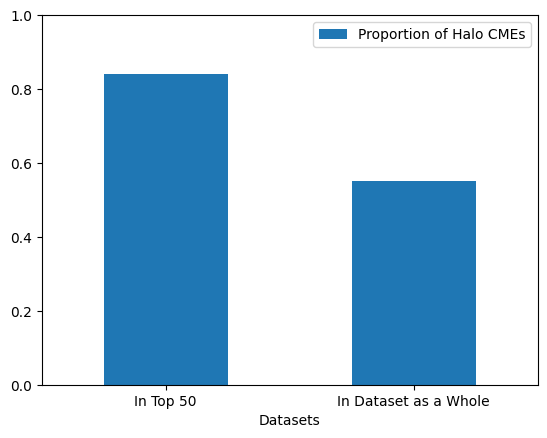

In [188]:
# creates a barplot with the y-axis being the proportion of flares that contain Halo CMEs and the x-axis being the two different data groups
df = pd.DataFrame({'Datasets':['In Top 50', 'In Dataset as a Whole'], 'Proportion of Halo CMEs':[halo_ratio_for_top_50, halo_ratio_for_all]})
ax = df.plot.bar(x='Datasets', y='Proportion of Halo CMEs', rot=0)
ax.set_ylim(0,1)

### Description of Plot: The barplot displays the ratio of Halo CMEs in the top 50 solar flares and then also in the dataset as a whole. The y-axis represents the proportion of Halo CMEs and the x-axis represents the two different data groups.

### Interpretation: We can see that there is a much stronger representation of Halo CMEs in the top 50 solar flares than there are in the dataset as a whole. We can possibly conclude that Halo CMEs are overrepresented in the top 50 solar flares than the rest of the dataset. 